<a href="https://colab.research.google.com/github/alagarde-bit/Data-Mining-and-Machine-Learning/blob/main/lab14_Lagarde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 14 Artificial Neural Networks
## CSC 401 Lab
## Alex Lagarde
### 4/12/21

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1ATf3eoCvAKG_I2luCV2gj_GRDUXoybFR')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
y = df['Survived']
X = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age']]
X = pd.get_dummies(X)
X = X.fillna(X.mean())

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, 
                                                y,
                                                test_size = 0.2,
                                                random_state = 0)

In [ ]:
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(2,1),
                    solver = 'sgd',
                    learning_rate_init = 0.0001,
                    activation = 'tanh',
                    max_iter = 1500,
                    tol = 1e-5,
                    n_iter_no_change = 50,
                    verbose = False)
mlp.fit(Xtrain, ytrain)
ypred = mlp.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


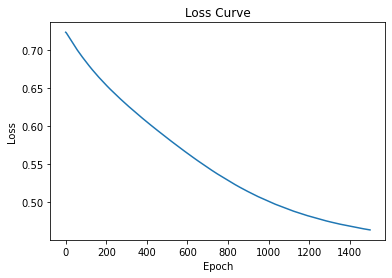

In [ ]:
plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(2,1),
                    solver = 'sgd',
                    learning_rate_init = 10,
                    activation = 'tanh',
                    max_iter = 1500,
                    tol = 1e-5,
                    n_iter_no_change = 50,
                    verbose = False)
mlp.fit(Xtrain, ytrain)
ypred = mlp.predict(Xtest)

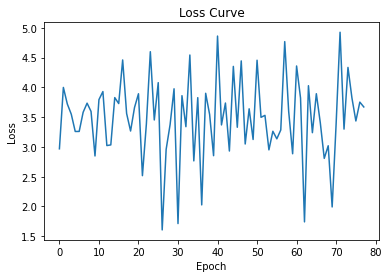

In [ ]:
plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(2,1),
                    solver = 'sgd',
                    learning_rate_init = 0.0053,
                    activation = 'tanh',
                    max_iter = 1500,
                    tol = 1e-5,
                    n_iter_no_change = 50,
                    verbose = False)
mlp.fit(Xtrain, ytrain)
ypred = mlp.predict(Xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


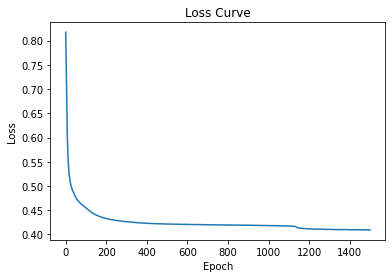

In [ ]:
plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(4,4,4,2),
                    solver = 'sgd',
                    learning_rate_init = 0.004,
                    activation = 'relu',
                    max_iter = 1500,
                    tol = 1e-5,
                    n_iter_no_change = 50,
                    verbose = False)
mlp.fit(Xtrain, ytrain)
ypred = mlp.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


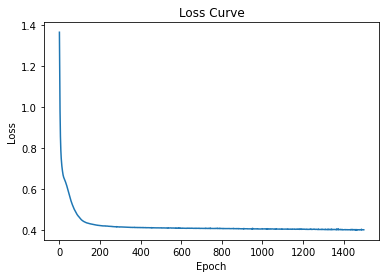

In [ ]:
plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

It seems like the relu activation function in comparison to tanh, adding more layers, and adding more nodes help the accuracy score for predicting testing data. The layers and nodes allow for more deep diving into the data, which means discovering more patterns meaningful patterns. For starters, when fitting the 79% model with relu instead tanh activation function, the model increased by a percentage to 80%. This suggested to me this algorithm is better for this data. In addition, the model was a bit underfit as when I added more layers and nodes very narrowly increased by 2%. When I added to many nodes or layers the model would regress as it became a tad overfit. The activation speed needed to be adjusted to make a nice loss curve. The speed needs to be fast enough so the model, as it trains by step, finds the minimum before max iterations, but it cannot be too fast to leap over the minimum. I found a nice sweet spot to help find the optimal accuracy.